<a href="https://colab.research.google.com/github/SUYAMBULAKSHMI-VENKATESAN/DAMAKA/blob/main/Segmentation_Hybrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+----------------+-----------------------------------+------------+-----------+
| Stage          | Parameters                        | Mean       | Std Dev   |
+================+===================================+============+===========+
| Canny Edge     | 50-150                            | Mean=2.99  | Std=27.47 |
+----------------+-----------------------------------+------------+-----------+
| Active Contour | alpha=0.015, beta=10, gamma=0.001 | Mean=98.19 | Std=31.01 |
+----------------+-----------------------------------+------------+-----------+


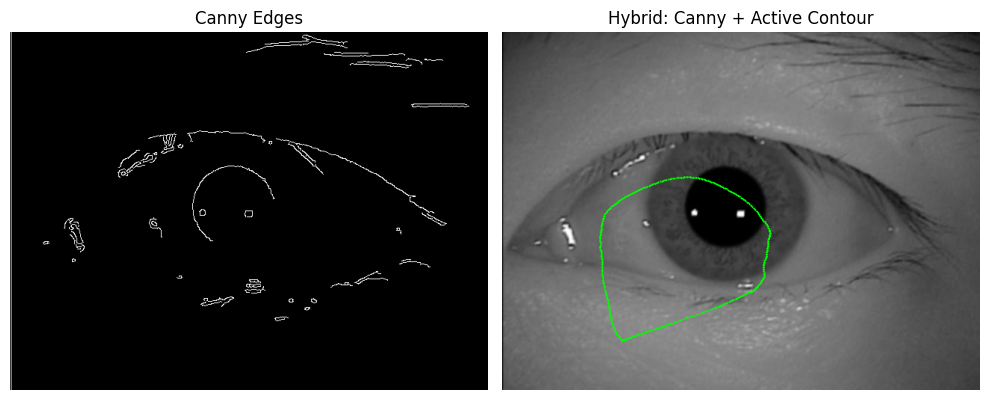

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from tabulate import tabulate


def apply_hybrid_segmentation(image_path):
    # Load and preprocess image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    # --- Step 1: Edge Detection (Canny) ---
    canny_thresh1 = 50
    canny_thresh2 = 150
    canny_edges = cv2.Canny(image, canny_thresh1, canny_thresh2)

    # --- Step 2: Smooth the edge map for active contour ---
    blurred = gaussian(canny_edges, sigma=2)

    # --- Step 3: Initialize contour around image center ---
    s = np.linspace(0, 2*np.pi, 400)
    r, c = image.shape[0] // 2, image.shape[1] // 2
    radius = min(r, c) // 2
    init = np.array([r + radius * np.sin(s), c + radius * np.cos(s)]).T

    # --- Step 4: Apply Active Contour ---
    snake = active_contour(blurred, init, alpha=0.015, beta=10, gamma=0.001)

    # --- Step 5: Overlay result ---
    result_img = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    snake_int = np.array(snake, dtype=np.int32)
    for point in snake_int:
        cv2.circle(result_img, tuple(point), 1, (0, 255, 0), -1)

    # Metrics
    table_data = [
        ["Canny Edge", f"{canny_thresh1}-{canny_thresh2}", f"Mean={np.mean(canny_edges):.2f}", f"Std={np.std(canny_edges):.2f}"],
        ["Active Contour", "alpha=0.015, beta=10, gamma=0.001", f"Mean={np.mean(result_img):.2f}", f"Std={np.std(result_img):.2f}"],
    ]
    headers = ["Stage", "Parameters", "Mean", "Std Dev"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(canny_edges, cmap='gray')
    plt.title("Canny Edges")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(result_img)
    plt.title("Hybrid: Canny + Active Contour")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return result_img

# Example usage:
hybrid_result = apply_hybrid_segmentation("/content/S6000S00.jpg")